<a href="https://colab.research.google.com/github/RAMSURYARAJ/heart_failure_prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import f1_score , accuracy_score , roc_auc_score
from sklearn.preprocessing import StandardScaler

In [34]:
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

In [92]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000,9.4,133,1,1,10,1


In [95]:
data.shape

(299, 13)

In [96]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000,9.4,133,1,1,10,1


In [97]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


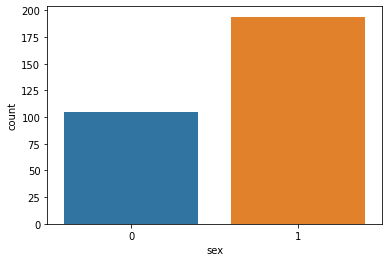

In [98]:
sns.countplot(data['sex']);

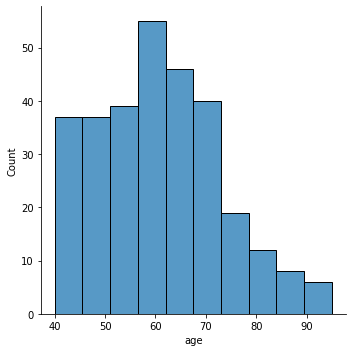

In [99]:
sns.displot(data['age']);

In [100]:
data['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [101]:
np.median(data['age'])

60.0

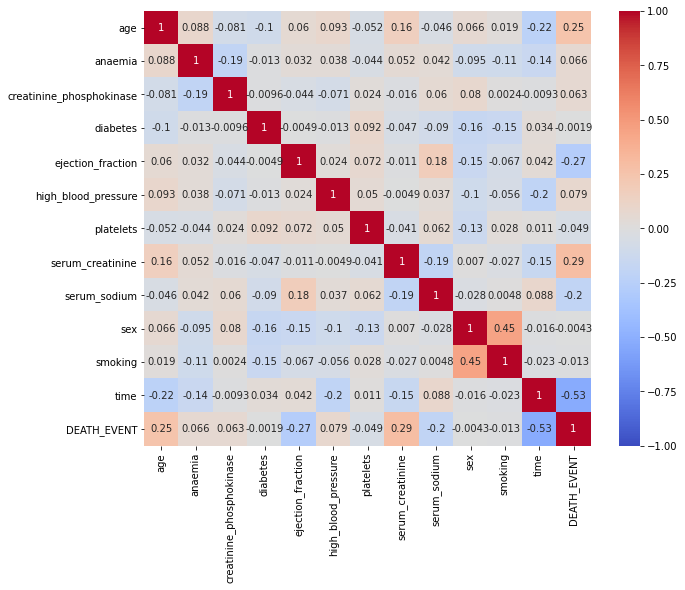

In [102]:
corr = data.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

In [103]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253581
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [104]:
X = data.drop(columns= 'DEATH_EVENT')
y = data['DEATH_EVENT']

In [105]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [108]:
s1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Linear Regression accuracy_score :", "{:.2f}%".format(100*s1),'\n'
      'Linear Regression f1-score : ', "{:.2f}%".format(100*f1))

Linear Regression accuracy_score : 88.33% 
Linear Regression f1-score :  80.00%


In [109]:
params = {
    'C' : [1,2,3,4,5,6,7,8,9,10,11],
    'penalty' : ['l1' , 'l2'],
    'max_iter' : [100,500]
}

In [110]:
model_cv = GridSearchCV(model , params , cv = 10 , n_jobs= -1)
model_cv.fit(X_train, y_train)
y_pred_cv = model_cv.predict(X_test)

In [111]:
s1_cv = accuracy_score(y_test,y_pred_cv)
f1_cv = f1_score(y_test,y_pred_cv)
print("Linear Regression accuracy_score :", "{:.2f}%".format(100*s1_cv),'\n'
      'Linear Regression f1-score : ', "{:.2f}%".format(100*f1_cv))

Linear Regression accuracy_score : 85.00% 
Linear Regression f1-score :  74.29%


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred_rf = RF_model.predict(X_test)

In [114]:
s1_rf = accuracy_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print("Random Forest Classifier accuracy_score :", "{:.2f}%".format(100*s1_rf),'\n'
      'Random Forest Classifier f1-score : ', "{:.2f}%".format(100*f1_rf))

Random Forest Classifier accuracy_score : 86.67% 
Random Forest Classifier f1-score :  78.95%
